In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
#py文件 有一些测试用的数据 
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
#py文件 
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline


In [2]:
#存在于planar_utils 读取随机创建的数据
X, Y = load_planar_dataset() 

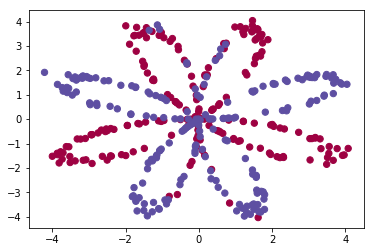

In [3]:
#结尾加分号会去除一些matplotlib的信息 试一下就知道了
#c = Y 会有结构错误  只使用Y的第一列就可以
plt.scatter(X[0, :], X[1, :], c = Y[0, :], s=40, cmap=plt.cm.Spectral);

In [4]:
#观察 训练数据的结构
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # training set size


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [5]:
#在scikit-learn中，与逻辑回归有关的主要是这3个类。
#LogisticRegression， LogisticRegressionCV 和logistic_regression_path。
#其中LogisticRegression和LogisticRegressionCV的主要区别是LogisticRegressionCV使用了交叉验证来选择正则化系数C。
#而LogisticRegression需要自己每次指定一个正则化系数。
#除了交叉验证，以及选择正则化系数C以外， LogisticRegression和LogisticRegressionCV的使用方法基本相同。
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\zcyln\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


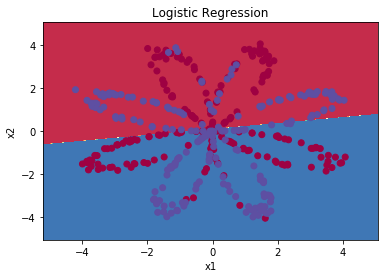

In [6]:
#还是会有 Y的结构问题   不知道为什么 我画的很模糊
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")

#输出准确率
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
#神经元设置
def layer_sizes(X, Y):
    #输入层
    n_x = X.shape[0] # size of input layer
    #直接设置为4
    n_h = 4
    #输出层
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [9]:
def initialize_parameters(n_x, n_h, n_y):
    #设置种子，每次随机都一样
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    #w初始化伪随机数，b初始化为0
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    #检测参数结构设置是否正确
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    #放入参数词典 方便调用
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


In [11]:
#自己写一个前向传递方法

def forward_propagation(X, parameters):

    #通过上一个方法可以知道W,b是什么
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    #神经单元内部计算
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.000499755777742 -0.000496963353232 0.000438187450959 0.500109546852


In [13]:
#计算代价函数
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # 使用的是 cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1-A2)) 
    cost = - 1/m * np.sum(logprobs) #不需要循环就可以将他们加在一起 求平均
    #将数组转换成int
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.692919893776


In [15]:
#反向传递方法
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    #之前的cache中存有A和Z
    A1 = cache['A1']
    A2 = cache['A2']
    
    # 反向计算梯度 dW1, db1, dW2, db2. 
    #搞懂各个参数的数据结构才能做出来
    dZ2 = A2 - Y
    dW2 =1/m * np.dot(dZ2, A1.T)
    db2 =1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 =1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[ 0.06589489]]


In [17]:
#更新参数
def update_parameters(parameters, grads, learning_rate = 1.2):
    #从字典 parameters中获取w，b
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #从grads中获取梯度
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    #更新参数
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


In [19]:
#创建一个神经网络模型
#从之前写的方法中获取参数
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    #调用initialize_parameters方法传入神经元数目
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    #使用循环计算梯度
    for i in range(0, num_iterations):
         
        #调用之前写过的方法 英文注释很清楚
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\zcyln\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\zcyln\Desktop\第一课第三周\planar_utils.py:69: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1 = [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2 = [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2 = [[-52.66607704]]


In [21]:
#预测 
def predict(parameters, X):

    # Computes probabilities using forward propagation, 
    # and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(parameters=parameters,X=X)
    #遍历A2的值 如果大于0.5 便返回1 否则返回零 这样便于计算准确率
    #在最后reshape成A2的形状 (不必须，这个方法就没有改变形状)
    predictions = np.array( [1 if x >0.5 else 0 
                             for x in A2.reshape(-1,1)] ).reshape(A2.shape) 
    
    return predictions

In [22]:
#测试分类准确度方法
parameters, X_assess = predict_test_case()
#求mean能看出有多少被分为1 多少为0  并不能看出精确度
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571


Text(0.5,1,'Decision Boundary for hidden layer size 4')

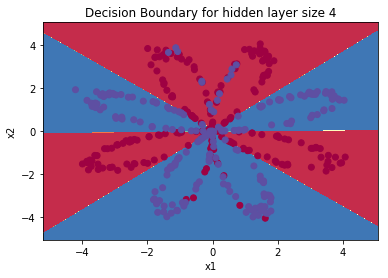

In [23]:
#训练模型
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# 画出分类图  Y处还是有结构上的问题
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# 打印准确率
#使用训练后的parameters
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
print ('predictions mean: ' + str(np.mean(predictions)))

Accuracy: 90%
predictions mean: 0.4875


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.0 %


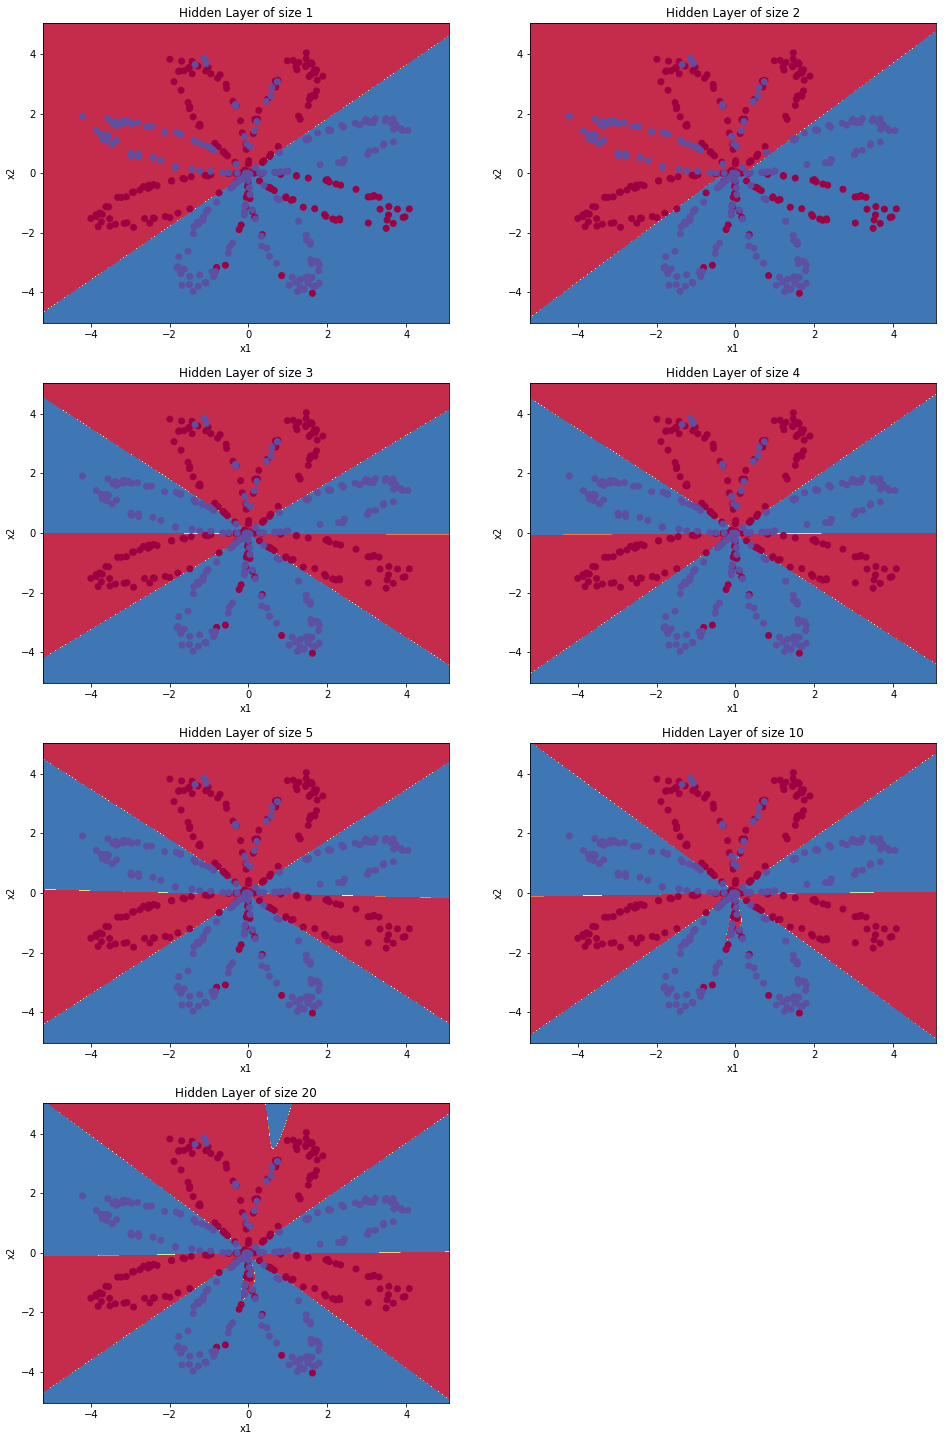

In [25]:
#用不同隐藏层的模型进行测试 会得到不同的结果
#画图时 还是要注意Y的结构

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.084774
Cost after iteration 2000: 0.060443
Cost after iteration 3000: 0.053889
Cost after iteration 4000: 0.049532
Cost after iteration 5000: 0.046092
Cost after iteration 6000: 0.045657
Cost after iteration 7000: 0.044446
Cost after iteration 8000: 0.043413
Cost after iteration 9000: 0.042501
Accuracy: 99%
predictions mean: 0.495
Accuracy for 1 hidden units: 67.0 %
Accuracy for 2 hidden units: 80.0 %
Accuracy for 3 hidden units: 95.0 %
Accuracy for 4 hidden units: 93.0 %
Accuracy for 5 hidden units: 92.5 %
Accuracy for 10 hidden units: 98.5 %
Accuracy for 20 hidden units: 99.0 %


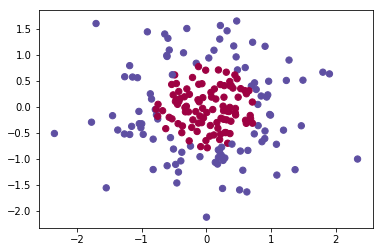

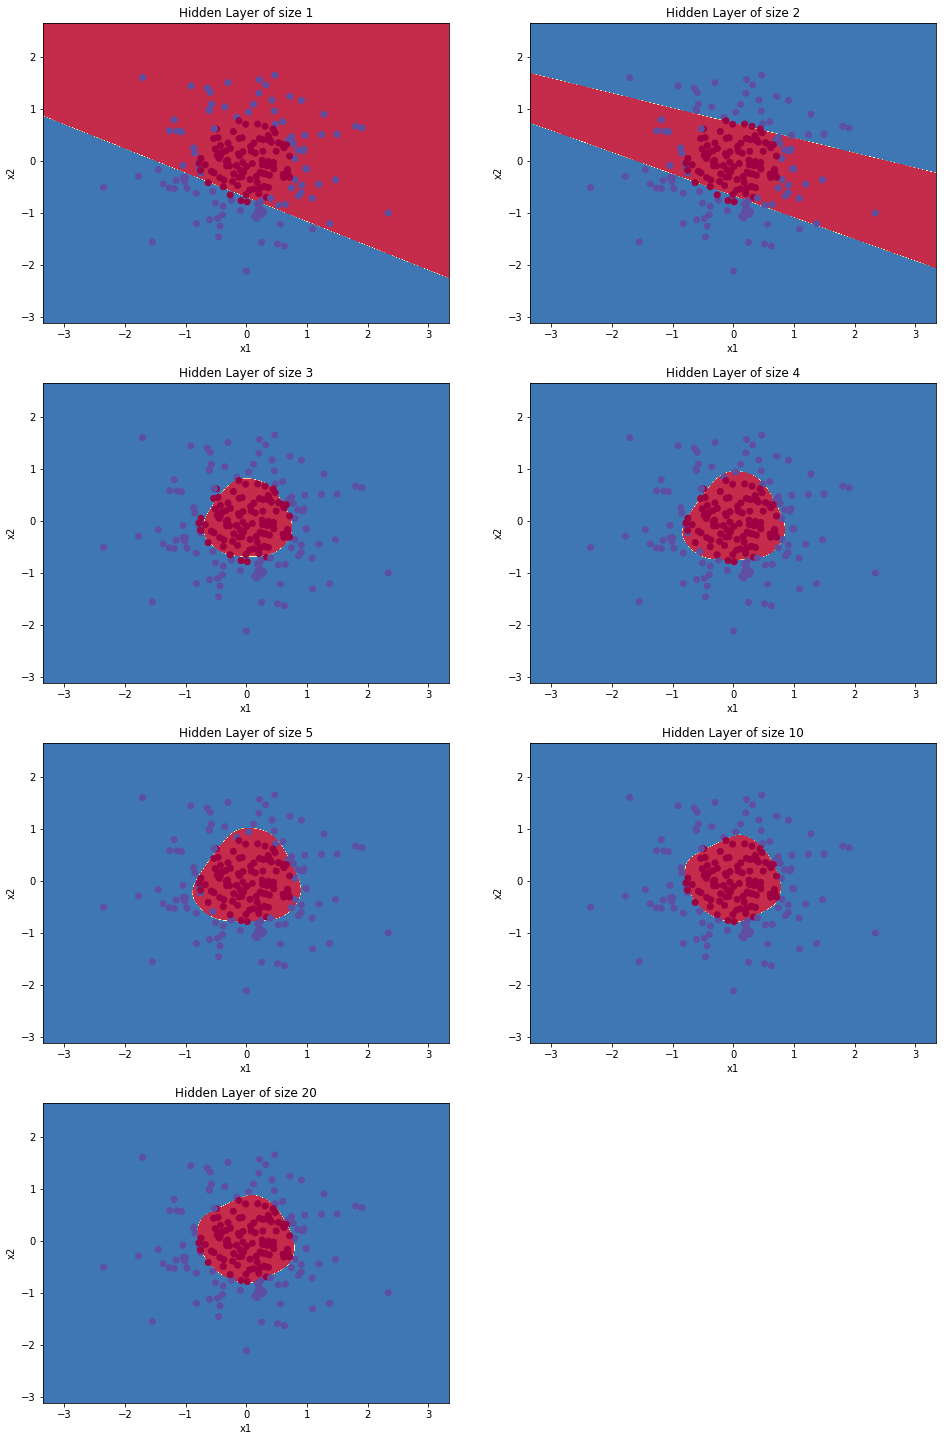

In [26]:
# 你可以再用这份数据进行 一次训练
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

#创建一个模型获得参数
parameters = nn_model(X=X,Y=Y,n_h=10,num_iterations=10000,print_cost=True)

#预测分类
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
print ('predictions mean: ' + str(np.mean(predictions)))

#用不同隐藏层的模型进行测试 会得到不同的结果
#画图时 还是要注意Y的结构
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [27]:
#不知道为啥  我画的图 不好看